In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [192]:
dfx = pd.read_csv('Logistic_X_Train.csv')
dfy = pd.read_csv('Logistic_Y_Train.csv')
dftest = pd.read_csv('Logistic_X_Test.csv')

In [193]:
## Load data into numpy arrays

X_train = dfx.values
Y_train = dfy.values
X_test = dftest.values

In [194]:
## Normalizing the data

u_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)
u_test = np.mean(X_test, axis=0)
std_test = np.std(X_test, axis=0)

X_train = (X_train-u_train)/std_train
X_test = (X_test-u_test)/std_test

### Logistic Regression Functions

In [272]:
def hypothesis(x, w, b):
    # This function will take input vector x, weight vector w, bias b and return the hypothesis or predicted value
    
    hx = np.dot(x,w)+b
    return sigmoid(hx)

def sigmoid(z):
    sig = 1.0/(1.0 + np.exp(-1.0*z))
    return sig

def error(Y_train, X_train, w, b):
    
    err = 0.0
    m = X_train.shape[0]
    
    for i in range(m):
        
        x = X_train[i]
        y = Y_train[i]
        hx = hypothesis(x, w, b)
        err += y*np.log2(hx) + (1-y)*np.log2(1-hx)
    
    err = -1.0*err
        
    return err/m

def gradient(Y_train, X_train, w, b):
    
    m = X_train.shape[0]
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    for i in range(m):
        hx = hypothesis(X_train[i], w, b)
        grad_w += (Y_train[i]-hx)*X_train[i]
        grad_b += Y_train[i]-hx
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w, grad_b]

def gradient_ascent(Y_train, X_train, w, b, max_iter=1000, learning_rate=0.1):
    
    error_list = []
    
    for i in range(max_iter):
        
        err = error(Y_train, X_train, w, b)
        error_list.append(err)
        [grad_w, grad_b] = gradient(Y_train, X_train, w, b)
        w = w + learning_rate*grad_w
        b = b + learning_rate*grad_b
        
    return error_list, w, b

def predictions(X_test, w, b):
    
    confidence = hypothesis(X_test, w, b)
    Y_pred = []
    
    for val in confidence:
        if val<0.5:
            Y_pred.append(0)
        else:
            Y_pred.append(1)
            
    return Y_pred

In [274]:
## Initialize the Weight vectors and call the function

W = 2*np.random.random((X_train.shape[1],))
B = 5*np.random.random()

error_list, w, b = gradient_ascent(Y_train, X_train, W, B)

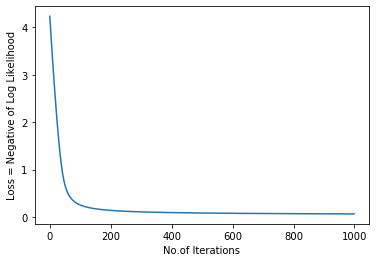

In [277]:
## Plot the loss function -> Error
## This indicates that the loss has significantly decreased over time

plt.plot(error_list)
plt.xlabel('No.of Iterations')
plt.ylabel('Loss = Negative of Log Likelihood')
plt.show()

In [284]:
pred = predictions(X_test, w, b)
result = pd.DataFrame(pred, columns=['label'])

In [289]:
result.to_csv('Submission.csv', index=None)